<a href="https://colab.research.google.com/github/ThanakitCh/hello-world/blob/master/Dogs_vs_Cats_Deep_Learning_with_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs. Cats : Deep Learning with Images
Build a convolutional neural network to classify whether images contain either a dog or a cat.

In [0]:
import os
import zipfile
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [0]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data')
zip_ref.close()

base_dir = '/data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
start = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=1000,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=50, 
      callbacks=[callbacks])
end = time.time()
print("time_total :", end - start, "seconds!")

Epoch 1/1000
Epoch 1/1000
100/100 - 23s - loss: 0.6942 - acc: 0.5225 - val_loss: 0.6768 - val_acc: 0.5700
Epoch 2/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6829 - acc: 0.5565 - val_loss: 0.6534 - val_acc: 0.6380
Epoch 3/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6629 - acc: 0.5895 - val_loss: 0.6322 - val_acc: 0.6460
Epoch 4/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6437 - acc: 0.6280 - val_loss: 0.6119 - val_acc: 0.6850
Epoch 5/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6324 - acc: 0.6400 - val_loss: 0.5930 - val_acc: 0.6790
Epoch 6/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6256 - acc: 0.6520 - val_loss: 0.5896 - val_acc: 0.6900
Epoch 7/1000
Epoch 1/1000
100/100 - 19s - loss: 0.5975 - acc: 0.6790 - val_loss: 0.7067 - val_acc: 0.5700
Epoch 8/1000
Epoch 1/1000
100/100 - 19s - loss: 0.6107 - acc: 0.6690 - val_loss: 0.5629 - val_acc: 0.7170
Epoch 9/1000
Epoch 1/1000
100/100 - 19s - loss: 0.5970 - acc: 0.6765 - val_loss: 0.6180 - val_acc: 0.6320
Epoch 10/1000
Epoch 1/1000
100/100 - 19s - los

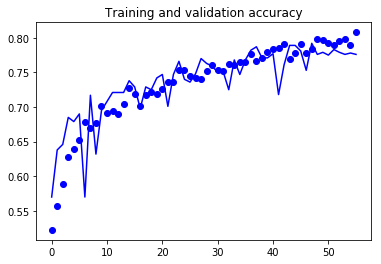

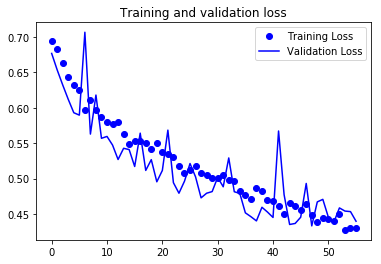

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving Cat1.jpg to Cat1 (5).jpg
Saving Cat2.jfif to Cat2.jfif
Saving Cat3.jfif to Cat3 (3).jfif
Saving Dog1.jpg to Dog1 (5).jpg
Saving Dog2.jpg to Dog2 (5).jpg
Saving Dog3.jpg to Dog3 (5).jpg
[0.]
Cat1.jpg is a cat
[0.]
Cat2.jfif is a cat
[0.]
Cat3.jfif is a cat
[1.]
Dog1.jpg is a dog
[1.]
Dog2.jpg is a dog
[1.]
Dog3.jpg is a dog
